<a href="https://colab.research.google.com/github/adshyam/News-Fraud-Detection/blob/main/News_Fraud_Detection_kaggle1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

News Fraud Detection
Dataset : https://www.kaggle.com/datasets/clmentbisaillon/fake-and-real-news-dataset?select=True.csv

In [ ]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [ ]:
data_fake= pd.read_csv('/content/sample_data/Fake.csv')
data_fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [ ]:
data_true= pd.read_csv('/content/sample_data/True.csv')
data_true.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [ ]:
data_fake.drop(['date'],axis=1,inplace=True)
data_true.drop(['date'],axis=1,inplace=True)

# labeling The dataset
data_fake['label'] = 0
data_true['label'] = 1


In [ ]:
# Concatenate datasets
data = pd.concat([data_fake, data_true],ignore_index=True,sort=False)
data.head()

,title,text,subject,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,0


In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

In [ ]:
data.shape

(44898, 4)

In [ ]:
#Remove a dependent feature 
X =data.drop('label',axis=1)

In [ ]:
X.head()

,title,text,subject
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News


In [ ]:
X.shape

(44898, 3)

In [ ]:
# Get a dependent feature
y = data['label']

In [ ]:
#Checking Null Values
data.isna().sum()

title      0
text       0
subject    0
label      0
dtype: int64

In [ ]:
data.shape

(44898, 4)

In [ ]:
data.head()

,title,text,subject,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,0


# Data Preprocessing 

In [ ]:
import nltk

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
from nltk.corpus import stopwords  #Removal of Stopwords
from nltk.stem.porter import PorterStemmer #Stemming Purpose
import re
ps = PorterStemmer()
lines = []
for i in range(0,len(data)):
    review = re.sub('[^a-zA-Z]', ' ', data['title'][i])
    review = review.lower()
    review = review.split()
    
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    lines.append(review)

In [ ]:
lines[:10]

['donald trump send embarrass new year eve messag disturb',
 'drunk brag trump staffer start russian collus investig',
 'sheriff david clark becom internet joke threaten poke peopl eye',
 'trump obsess even obama name code websit imag',
 'pope franci call donald trump christma speech',
 'racist alabama cop brutal black boy handcuff graphic imag',
 'fresh golf cours trump lash fbi deputi director jame comey',
 'trump said insan racist stuff insid oval offic wit back',
 'former cia director slam trump un bulli openli suggest act like dictat tweet',
 'watch brand new pro trump ad featur much kiss make sick']

In [ ]:
# Applying CountVectorizer
# Creating Bag of Words Model
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features =5000, ngram_range=(1,3))
X=cv.fit_transform(lines).toarray()

In [ ]:
# Independent features shape
X.shape

(44898, 5000)

In [ ]:
y = data['label']

In [ ]:
y.shape

(44898,)

In [ ]:
# Dividing the dataset into Training & Testing data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.33, random_state=42,shuffle=True )



In [ ]:
cv.get_feature_names_out()[:10] # View top 10 feature names


array(['abadi', 'abandon', 'abba', 'abc', 'abc news', 'abe', 'abedin',
       'abil', 'abl', 'abort'], dtype=object)

In [ ]:
cv.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.int64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': 5000,
 'min_df': 1,
 'ngram_range': (1, 3),
 'preprocessor': None,
 'stop_words': None,
 'strip_accents': None,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'vocabulary': None}

In [ ]:
# Create a DataFrame of X_train data
cv_data = pd.DataFrame(X_train, columns = cv.get_feature_names_out())


In [ ]:
cv_data.head()

,abadi,abandon,abba,abc,abc news,abe,abedin,abil,abl,abort,...,zero,zika,zika fund,zimbabw,zimbabw mnangagwa,zimbabw mugab,zone,zor,zuckerberg,zuma
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
import matplotlib.pyplot as plt

In [ ]:
"""References :  http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
                This function prints and plots the confusion matrix.
                Normalization can be applied by setting `normalize=True`.
                """

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
                          
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True Label')
    plt.xlabel('Prdicted label')
    

# Modeling 


We will develop Multinomial Naives Bayes, Bernoulli Naive Bayes and Bidirectional LSTM

#1. Multinomial Naives Bayes

In [ ]:
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB()

In [ ]:
from sklearn import metrics
import numpy as np
import itertools

accuracy : 0.931

Classification Report :
              precision    recall  f1-score   support

           0       0.93      0.94      0.93      7778
           1       0.93      0.92      0.93      7039

    accuracy                           0.93     14817
   macro avg       0.93      0.93      0.93     14817
weighted avg       0.93      0.93      0.93     14817

                                                                          
Confusion Matrix created by using Multinomial Naive Bayes Algorithm
Confusion matrix, without normalization


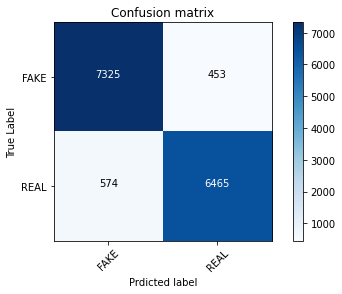

In [ ]:
from sklearn.metrics import classification_report, accuracy_score

classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
score = metrics.accuracy_score(y_test, y_pred)
print('accuracy : %0.3f' %score)
print("\nClassification Report :")
print(classification_report(y_test, y_pred))
print('                                                                          ')
print('Confusion Matrix created by using Multinomial Naive Bayes Algorithm')
cm = metrics.confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm, classes = ['FAKE', 'REAL'])

5-fold cross-validation.

In [ ]:
from sklearn.model_selection import GridSearchCV

n_classes= np.unique(y)
params = {'alpha': [0.01, 0.1, 0.5, 1.0, 10.0],
          'fit_prior': [True, False],
          'class_prior': [None, [0.1,]* len(n_classes), ],
         }

multinomial_nb_grid = GridSearchCV(MultinomialNB(), param_grid=params, n_jobs=-1, cv=5, verbose=5)
multinomial_nb_grid.fit(X_train,y_train)

print('Best Parameters : {}'.format(multinomial_nb_grid.best_params_))
print('Best Accuracy Through Grid Search : {:.3f}\n'.format(multinomial_nb_grid.best_score_))

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best Parameters : {'alpha': 0.1, 'class_prior': None, 'fit_prior': False}
Best Accuracy Through Grid Search : 0.931



Evaluate the performance of the Fine Tuned Model


Test Accuracy Score : 0.932

Classification Report after HyperParamter tuning:
              precision    recall  f1-score   support

           0       0.93      0.94      0.94      7778
           1       0.94      0.92      0.93      7039

    accuracy                           0.93     14817
   macro avg       0.93      0.93      0.93     14817
weighted avg       0.93      0.93      0.93     14817

Confusion Matrix created by using Multinomial Naive Bayes Algorithm after Hyperparameter Tuning
Confusion matrix, without normalization


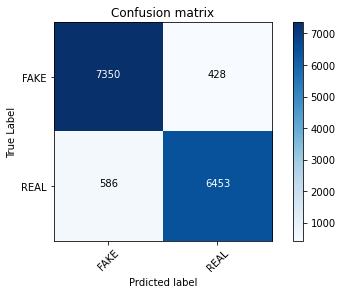

In [ ]:
from sklearn.metrics import classification_report, accuracy_score

y_preds = multinomial_nb_grid.best_estimator_.predict(X_test)

print("Test Accuracy Score : {:.3f}".format(accuracy_score(y_test, y_preds)))

print("\nClassification Report after HyperParamter tuning:")
print(classification_report(y_test, y_preds))

print('Confusion Matrix created by using Multinomial Naive Bayes Algorithm after Hyperparameter Tuning')
cm_tuned = metrics.confusion_matrix(y_test, y_preds)
plot_confusion_matrix(cm_tuned, classes = ['FAKE', 'REAL'])

# 2. Bernoulli Naive Bayes

In [ ]:
from sklearn.naive_bayes import BernoulliNB
model_BNB= BernoulliNB() # define Bernoulli Naive Bayes Model

The accuracy score obtained from Bernoulli Naive Bayes is : 0.936
                                                                          

Classification Report
              precision    recall  f1-score   support

           0       0.94      0.93      0.94      7778
           1       0.93      0.94      0.93      7039

    accuracy                           0.94     14817
   macro avg       0.94      0.94      0.94     14817
weighted avg       0.94      0.94      0.94     14817

Confusion Matrix created by using Bernoulli Naive Bayes Algorithm
Confusion matrix, without normalization


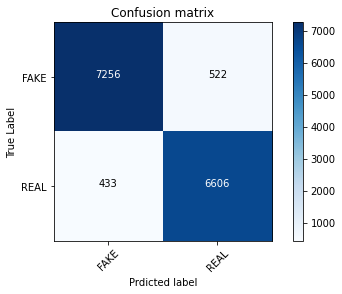

In [ ]:
model_BNB.fit(X_train, y_train) # fit the data in the model
y_pred_B = model_BNB.predict(X_test) # predicted y values by Bernoulli model
score_BNB = metrics.accuracy_score(y_test, y_pred_B) # calculate the accuracy score of model
print('The accuracy score obtained from Bernoulli Naive Bayes is : %.3f' %score_BNB)
print('                                                                          ')
print("\nClassification Report")
print(classification_report(y_test, y_pred_B))
print('Confusion Matrix created by using Bernoulli Naive Bayes Algorithm')
cm_BNB = metrics.confusion_matrix(y_test, y_pred_B)
plot_confusion_matrix(cm_BNB, classes = ['FAKE', 'REAL'])

5-fold cross-validation for Bernoulli NB

In [ ]:
params = {'alpha': [0.01, 0.1, 0.5, 1.0, 10.0],
          'fit_prior': [True, False],
          'class_prior': [None, [0.1,]* len(n_classes), ],
          'binarize': [None, 0.0, 8.5, 10.0]
         }

bernoulli_nb_grid = GridSearchCV(BernoulliNB(), param_grid=params, n_jobs=-1, cv=5, verbose=5)
bernoulli_nb_grid.fit(X_train,y_train)

print('Best Parameters : {}'.format(bernoulli_nb_grid.best_params_))
print('Best Accuracy Through Grid Search : {:.3f}\n'.format(bernoulli_nb_grid.best_score_))

Fitting 5 folds for each of 80 candidates, totalling 400 fits
Best Parameters : {'alpha': 0.5, 'binarize': None, 'class_prior': None, 'fit_prior': True}
Best Accuracy Through Grid Search : 0.935



Evaluate the performance of the Fine Tuned Model

Test Accuracy Score after Hyperparameter Tuning: 0.936

Classification Report after Hyperparameter Tuning:
              precision    recall  f1-score   support

           0       0.93      0.94      0.94      7778
           1       0.94      0.92      0.93      7039

    accuracy                           0.93     14817
   macro avg       0.93      0.93      0.93     14817
weighted avg       0.93      0.93      0.93     14817

Confusion Matrix created by using Bernoulli Naive Bayes Algorithm after Hyperparameter Tuning
Confusion matrix, without normalization


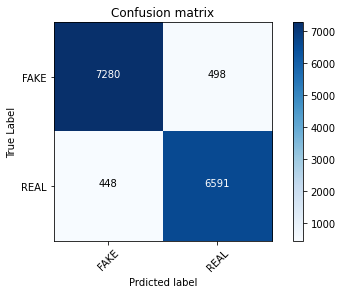

In [ ]:

from sklearn.metrics import classification_report, accuracy_score

y_pred_Bs = bernoulli_nb_grid.best_estimator_.predict(X_test)

print("Test Accuracy Score after Hyperparameter Tuning: {:.3f}".format(accuracy_score(y_test, y_pred_Bs)))

print("\nClassification Report after Hyperparameter Tuning:")
print(classification_report(y_test, y_preds))

print('Confusion Matrix created by using Bernoulli Naive Bayes Algorithm after Hyperparameter Tuning')
cm_BNB = metrics.confusion_matrix(y_test, y_pred_Bs)
plot_confusion_matrix(cm_BNB, classes = ['FAKE', 'REAL'])

# 3. Bidirectional LSTM

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Bidirectional
from tensorflow.keras.layers import Dropout


In [ ]:
lines[:5]

['donald trump send embarrass new year eve messag disturb',
 'drunk brag trump staffer start russian collus investig',
 'sheriff david clark becom internet joke threaten poke peopl eye',
 'trump obsess even obama name code websit imag',
 'pope franci call donald trump christma speech']

In [ ]:
voc_size = 5000  #Vocabulary size
onehot_rep = [one_hot(words, voc_size) for words in lines]
onehot_rep[:10]

[[348, 311, 350, 3135, 3815, 4214, 1332, 4439, 2899],
 [4738, 484, 311, 3300, 1226, 3251, 4518, 4188],
 [1558, 4334, 4616, 2639, 3459, 1783, 4772, 3436, 1846, 988],
 [311, 1440, 3269, 1942, 3221, 932, 2853, 4314],
 [2789, 1422, 976, 348, 311, 4005, 1011],
 [3599, 1794, 594, 4169, 4151, 4828, 1062, 2531, 4314],
 [286, 54, 1618, 311, 2952, 3702, 2791, 2726, 2659, 4472],
 [311, 1087, 2198, 3599, 3850, 4259, 2942, 447, 146, 4916],
 [4701, 1132, 2726, 132, 311, 243, 1871, 4103, 306, 1179, 266, 1621, 4947],
 [3592, 343, 3815, 4021, 311, 2322, 2057, 507, 4123, 4339, 4106]]

# Embedding Representation

In [ ]:
sent_length=20
embedded_docs=pad_sequences(onehot_rep,padding='pre',maxlen=sent_length)
print(embedded_docs)

[[   0    0    0 ... 1332 4439 2899]
 [   0    0    0 ... 3251 4518 4188]
 [   0    0    0 ... 3436 1846  988]
 ...
 [   0    0    0 ... 3572 2639 2198]
 [   0    0    0 ... 1422 3958  385]
 [   0    0    0 ... 3424 3251 2570]]


Creating a Model

In [ ]:
embedding_vector_features=40
model=Sequential()
model.add(Embedding(voc_size,embedding_vector_features,input_length=sent_length))
model.add(LSTM(100))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 20, 40)            200000    
                                                                 
 lstm (LSTM)                 (None, 100)               56400     
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 256,501
Trainable params: 256,501
Non-trainable params: 0
_________________________________________________________________
None


Creating a Model

In [ ]:
embedding_vector_features=40
model1=Sequential()
model1.add(Embedding(voc_size,embedding_vector_features,input_length=sent_length))
model1.add(Bidirectional(LSTM(100)))
model1.add(Dropout(0.3))
model1.add(Dense(1,activation='sigmoid'))
model1.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
print(model1.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 20, 40)            200000    
                                                                 
 bidirectional (Bidirectiona  (None, 200)              112800    
 l)                                                              
                                                                 
 dropout (Dropout)           (None, 200)               0         
                                                                 
 dense_1 (Dense)             (None, 1)                 201       
                                                                 
Total params: 313,001
Trainable params: 313,001
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
len(embedded_docs),y.shape

(44898, (44898,))

In [ ]:
import numpy as np
X_final=np.array(embedded_docs)
y_final=np.array(y)

In [ ]:
X_final.shape,y_final.shape

((44898, 20), (44898,))

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_final, y_final, test_size=0.33, random_state=42)

Model Training

In [ ]:
### Finally Training
model1.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=10,batch_size=64)

Epoch 1/10
471/471 [==============================] - 47s 86ms/step - loss: 0.2206 - accuracy: 0.9084 - val_loss: 0.1658 - val_accuracy: 0.9322
Epoch 2/10
471/471 [==============================] - 41s 86ms/step - loss: 0.1312 - accuracy: 0.9501 - val_loss: 0.1610 - val_accuracy: 0.9360
Epoch 3/10
471/471 [==============================] - 39s 82ms/step - loss: 0.1037 - accuracy: 0.9613 - val_loss: 0.1711 - val_accuracy: 0.9362
Epoch 4/10
471/471 [==============================] - 40s 84ms/step - loss: 0.0862 - accuracy: 0.9697 - val_loss: 0.1750 - val_accuracy: 0.9347
Epoch 5/10
471/471 [==============================] - 39s 84ms/step - loss: 0.0708 - accuracy: 0.9746 - val_loss: 0.2035 - val_accuracy: 0.9366
Epoch 6/10
471/471 [==============================] - 40s 86ms/step - loss: 0.0616 - accuracy: 0.9778 - val_loss: 0.1741 - val_accuracy: 0.9387
Epoch 7/10
471/471 [==============================] - 40s 86ms/step - loss: 0.0470 - accuracy: 0.9836 - val_loss: 0.2167 - val_accuracy:

Performance Metrics and Accuracy

In [ ]:
y_pred1=model1.predict(X_test)
y_pred1 = (y_pred1 > 0.5) # Convert regression values into classification values

464/464 [==============================] - 7s 13ms/step


In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report


The confusion matrix is : [[7155  623]
 [ 382 6657]]
The accuracy score is : 0.9321725045555781
              precision    recall  f1-score   support

           0       0.95      0.92      0.93      7778
           1       0.91      0.95      0.93      7039

    accuracy                           0.93     14817
   macro avg       0.93      0.93      0.93     14817
weighted avg       0.93      0.93      0.93     14817

Confusion Matrix created by using Bidirectional LSTM
Confusion matrix, without normalization


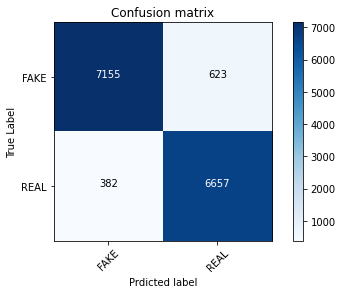

In [ ]:
print('The confusion matrix is :',confusion_matrix(y_test,y_pred1))
print('The accuracy score is :', accuracy_score(y_test,y_pred1))
print(classification_report(y_test,y_pred1))

print('Confusion Matrix created by using Bidirectional LSTM')
cm_BNB = metrics.confusion_matrix(y_test, y_pred1)
plot_confusion_matrix(cm_BNB, classes = ['FAKE', 'REAL'])